In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bad_circulation = pd.read_csv("bad_circulation.csv")
soso_circulation = pd.read_csv("soso_circulation.csv")

del bad_circulation['Unnamed: 0']
del soso_circulation['Unnamed: 0']

bad_date = bad_circulation.date
#home living 부분만 column 이름에 따라서 바꿔주면 됨. 원하는 거
bad_social = bad_circulation.social
soso_date = soso_circulation.date
soso_social = soso_circulation.social

bad_date = pd.DataFrame(bad_date)
bad_social = pd.DataFrame(bad_social)
soso_date = pd.DataFrame(soso_date)
soso_social = pd.DataFrame(soso_social)

bad = pd.concat([bad_date, bad_social], axis = 1)
soso = pd.concat([soso_date, soso_social], axis = 1)

bad = bad.rename(columns={'social': 'bad_social'})
soso = soso.rename(columns={'social': 'soso_social'})
bad = bad.reset_index(drop=True)
soso = soso.reset_index(drop=True)

soso = soso.dropna()
bad = bad.dropna()

bad_date = bad.date.tolist()
bad_social = bad.bad_social.tolist()
soso_date = soso.date.tolist()
soso_social = soso.soso_social.tolist()

bad_column = bad_circulation.columns
result = []
for i in bad_social:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)
    
bad_social = pd.DataFrame(result)
bad_date = pd.DataFrame(bad_date)

bad = pd.concat([bad_date, bad_social], axis = 1)
bad.columns = ["date", "bad_social"]

result = []
for i in soso_social:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)
    
soso_social = pd.DataFrame(result)
soso_date = pd.DataFrame(soso_date)

soso = pd.concat([soso_date, soso_social], axis = 1)
soso.columns = ["date", "soso_social"] 

bad_ha = {}
result = []
date = bad.date
social = bad.bad_social
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in bad_ha):
                    if type(bad_ha[date[i]]) != list:
                        result.append(bad_ha[date[i]])
                    else:
                        result = bad_ha[date[i]]
                    result.append(social[i])
                    bad_ha[date[i]] = result
                    pass
                else:
                    bad_ha[date[i]] = social[i]
            else:
                i = j
                break
        else:
            i = j
            break
            
bad_date_key = list(bad_ha.keys())
bad_social_aver = {}
social_result_bad = []
social_date_bad = []

for i in bad_date_key:
    aver = 0
    for j in bad_ha[i]:
        aver = aver + float(j)
    aver = aver / len(bad_ha[i])
    social_result_bad.append(aver)
    social_date_bad.append(i)
    bad_social_aver[i] = aver
    
soso_ha = {}
result = []
date = soso.date
social = soso.soso_social
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in soso_ha):
                    if type(soso_ha[date[i]]) != list:
                        result.append(soso_ha[date[i]])
                    else:
                        result = soso_ha[date[i]]
                    result.append(social[i])
                    soso_ha[date[i]] = result
                    pass
                else:
                    soso_ha[date[i]] = social[i]
            else:
                i = j
                break
        else:
            i = j
            break

soso_date_key = list(soso_ha.keys())
soso_social_aver = {} 
social_result_soso = []
social_date_soso = []

for i in soso_date_key:
    aver = 0
    for j in soso_ha[i]:
        aver = aver + float(j)
    aver = aver / len(soso_ha[i])
    social_result_soso.append(aver)
    social_date_soso.append(i)
    soso_social_aver[i] = aver
    
social_date_soso_temp = social_date_soso
social_date_soso_temp = pd.DataFrame(social_date_soso_temp)
social_result_soso_temp = social_result_soso
social_result_soso_temp = pd.DataFrame(social_result_soso_temp)
soso_social = pd.concat([social_date_soso_temp, social_result_soso_temp], axis=1)
soso_social.columns = ['date', 'aver_soso']

social_date_bad_temp = social_date_bad
social_date_bad_temp = pd.DataFrame(social_date_bad_temp)
social_result_bad_temp = social_result_bad
social_result_bad_temp = pd.DataFrame(social_result_bad_temp)
bad_social = pd.concat([social_date_bad_temp, social_result_bad_temp], axis=1)
bad_social.columns = ['date', 'aver_bad']

social = pd.merge(soso_social, bad_social, how='outer')
social = social.sort_values(by = "date")
social = social.reset_index()

del social['index']

social['DateTime'] = social['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
del social['date']
social = social.set_index("DateTime")


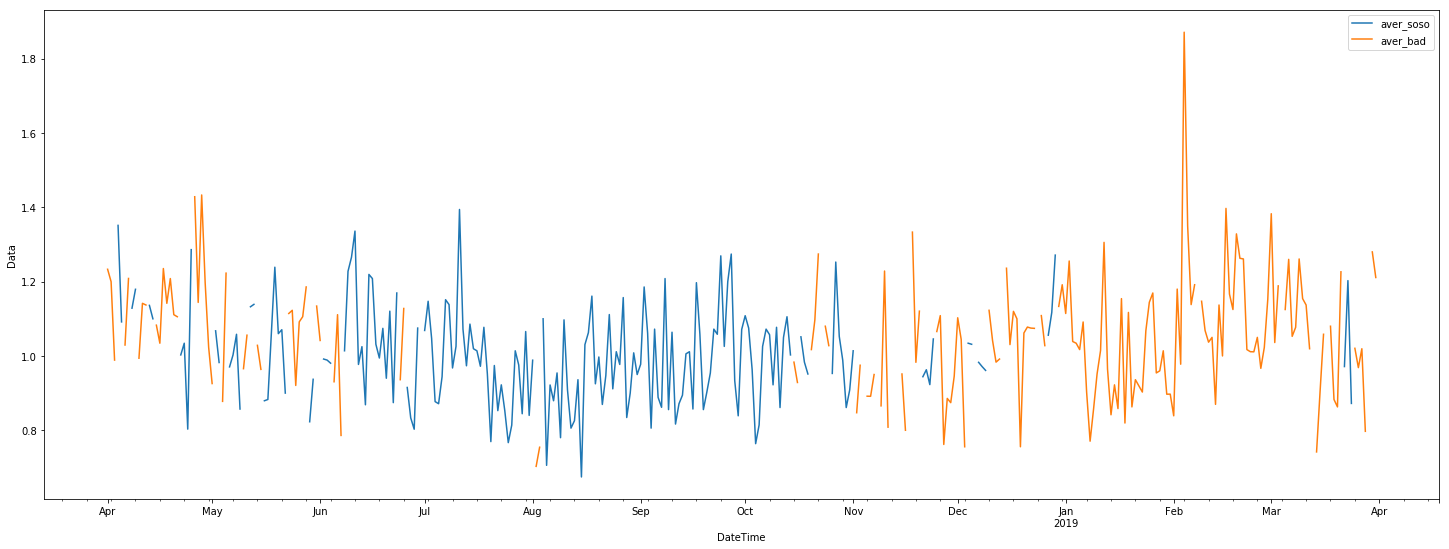

In [4]:
social.plot()
plt.ylabel("Data")
plt.rcParams["figure.figsize"] = [25,9]
plt.show()